## Лабораторная работа 8 ##

Загрузка данных из .doc файлов:

In [96]:
import os
import win32com.client

# Укажите правильный путь к папке с файлами
data_path = os.path.abspath("..//static//csv//tz_itdocs")

# Проверка существования папки
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Папка {data_path} не найдена.")

# Инициализация Word
word = win32com.client.Dispatch("Word.Application")
word.Visible = False  # Используйте свойство Visible с заглавной буквы

# Чтение всех .doc файлов
texts = []
for filename in os.listdir(data_path):
    if filename.endswith(".doc"):
        file_path = os.path.join(data_path, filename)
        try:
            # Открытие документа
            doc = word.Documents.Open(file_path)
            text = doc.Content.Text
            texts.append(text)
            doc.Close(SaveChanges=False)  # Закрыть без сохранения изменений
        except Exception as e:
            print(f"Ошибка при чтении файла {filename}: {e}")

# Закрытие Word
word.Quit()

# Вывод результата
print(f"Загружено {len(texts)} документов.")

Загружено 41 документов.


Предобработка текста:

In [97]:
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Удаление спецсимволов
    text = re.sub(r'\W', ' ', text)
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление стоп-слов и лемматизация
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Применение предобработки к каждому документу
texts = [preprocess_text(text) for text in texts]

Векторизация текста

In [100]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)

Кластеризация с использованием K-means

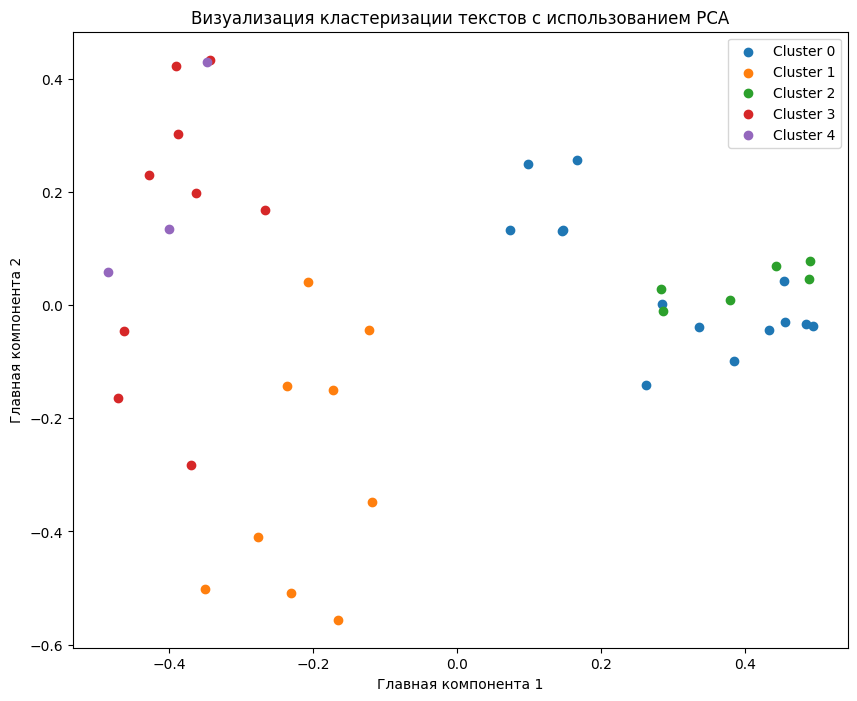

text  cluster     pca_1  \
0  2 2 техническое задание 2 2 1 общие сведения п...        2  0.379267   
1  2 2 техническое задание 2 2 1 общие сведения п...        0  0.453726   
2  2 2 техническое задание общие сведения данной ...        2  0.490069   
3  техническое задание 2 2 1 общие сведения интер...        0  0.073403   
4  2 2 техническое задание 2 2 1 общие сведения 1...        0  0.494253   

      pca_2  
0  0.009187  
1  0.042687  
2  0.078381  
3  0.132265  
4 -0.036965

text  cluster     pca_1  \
36  этапы разработки проекта заключительные стадии...        3 -0.471378   
37  этапы разработки проекта определение стратегии...        1 -0.350179   
38  этапы разработки проекта реализация тестирован...        1 -0.230170   
39  этапы разработки проекта стратегия анализ введ...        1 -0.277140   
40  2 1 3 язык манипуляции данными ямд язык манипу...        3 -0.267309   

       pca_2  
36 -0.163534  
37 -0.501840  
38 -0.509385  
39 -0.409235  
40  0.168029

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

num_clusters = 5  # Количество кластеров!
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Визуализация кластеров с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())  # Преобразуем разреженную матрицу в плотную

# Уменьшение размерности с помощью PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Преобразуем разреженную матрицу в плотную

# Создаем DataFrame для удобства
df = pd.DataFrame({
    "text": texts,  # Исходные тексты
    "cluster": clusters,  # Метки кластеров
    "pca_1": X_pca[:, 0],  # Первая компонента PCA
    "pca_2": X_pca[:, 1]   # Вторая компонента PCA
})

# Визуализация кластеров
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    # Выбор точек, принадлежащих текущему кластеру
    cluster_points = df[df["cluster"] == cluster]
    plt.scatter(cluster_points["pca_1"], cluster_points["pca_2"], label=f'Cluster {cluster}')

plt.title("Визуализация кластеризации текстов с использованием PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend()
plt.show()

# Вывод первых и последних строк DataFrame
display(df.head(), df.tail())

Классификация текстов (пример с использованием SVM)

In [ ]:
from sklearn.svm import SVC

y = kmeans.labels_  # Пример меток классов

# Разделение данных на обучающую и тестовую выборки!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = svm_model.predict(X_test)

# Оценка качества классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))
print(f"Точность: {accuracy_score(y_test, y_pred):.2f}")

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         3

    accuracy                           0.77        13
   macro avg       0.64      0.75      0.68        13
weighted avg       0.64      0.77      0.69        13

Точность: 0.77


d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz